# Cross-Country Comparison
**Objective:**  
Compare the cleaned solar datasets of **Benin**, **Sierra Leone**, and **Togo** to understand relative solar potential, key statistical differences, and actionable insights for solar energy deployment

## 1. Setup & Data Loading
In this section, we import required libraries and load the cleaned CSVs for each country from the `data/` directory.


In [1]:
import sys
from pathlib import Path

# Add project root to sys.path
project_root = Path().resolve().parent  # Adjust if notebook is inside notebooks/
sys.path.append(str(project_root))


In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.data_loader import load_clean_csv
from src.analysis import summary_table, anova_test, kruskal_test

sns.set(style="whitegrid")


In [3]:
#load cleaned CSVs and add a country column
paths = {
    "Benin": "../data/benin_clean.csv",
    "Sierra_Leone": "../data/sierraleone_clean.csv",
    "Togo": "../data/togo_clean.csv"
}

dfs = []
for country, p in paths.items():
    df = load_clean_csv(p, parse_dates=["Timestamp"])
    df['Country'] = country
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
print(f"Combined rows: {len(df_all)}")
df_all.head()


Combined rows: 1543517


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,Cleaning,Precipitation,TModA,TModB,Hour,DayOfWeek,Month,Year,TimeOfDay,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,0,0.0,26.3,26.2,0,Monday,August,2021,Night,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,0,0.0,26.3,26.2,0,Monday,August,2021,Night,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,0,0.0,26.4,26.2,0,Monday,August,2021,Night,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,0,0.0,26.4,26.3,0,Monday,August,2021,Night,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,0,0.0,26.4,26.3,0,Monday,August,2021,Night,Benin


## 2. Data Overview
Quick check of data shape, structure, and first few rows from each dataset to confirm successful loading.


In [ ]:
# Check groups
print(df_all['Country'].value_counts())
print('shape',df_all.shape)
# Basic describe per country for GHI
df_all.groupby('Country').describe()


Country
Benin           517860
Togo            516349
Sierra_Leone    509308
Name: count, dtype: int64
shape (1543517, 24)


Timestamp                                                      \
                 count                           mean                  min   
Country                                                                      
Benin           517860  2022-02-07 04:30:32.971035136  2021-08-09 00:01:00   
Sierra_Leone    509308  2022-04-29 18:45:56.196957440  2021-10-30 00:01:00   
Togo            516349  2022-04-25 13:20:08.506455808  2021-10-25 00:01:00   

                                                                             \
                              25%                  50%                  75%   
Country                                                                       
Benin         2021-11-08 00:49:45  2022-02-06 11:47:30  2022-05-09 17:21:45   
Sierra_Leone  2022-01-29 08:28:45  2022-04-28 22:48:30  2022-07-29 01:19:15   
Togo          2022-01-23 20:12:00  2022-04-25 22:55:00  2022-07-25 23:21:00   

                                             GHI              ...  Hour  \
                              max  std     count        mean  ...   max   
Country                                                       ...         
Benin         2022-08-09 00:00:00  NaN  517860.0  236.234508  ...  23.0   
Sierra_Leone  2022-10-30 00:00:00  NaN  509308.0  185.000024  ...  23.0   
Togo          2022-10-25 00:00:00  NaN  516349.0  223.859675  ...  23.0   

                            Year                                               \
                   std     count         mean     min     25%     50%     75%   
Country                                                                         
Benin         6.948996  517860.0  2021.600396  2021.0  2021.0  2022.0  2022.0   
Sierra_Leone  7.001475  509308.0  2021.829072  2021.0  2022.0  2022.0  2022.0   
Togo          6.959371  516349.0  2021.811964  2021.0  2022.0  2022.0  2022.0   

                                
                 max       std  
Country                         
Benin         2022.0  0.489817  
Sierra_Leone  2022.0  0.376446  
Togo          2022.0  0.390741  

[3 rows x 160 columns]

## 3. Metric Comparison
We compare the **Global Horizontal Irradiance (GHI)**, **Direct Normal Irradiance (DNI)**, and **Diffuse Horizontal Irradiance (DHI)** metrics across all three countries using boxplots and summary statistics.


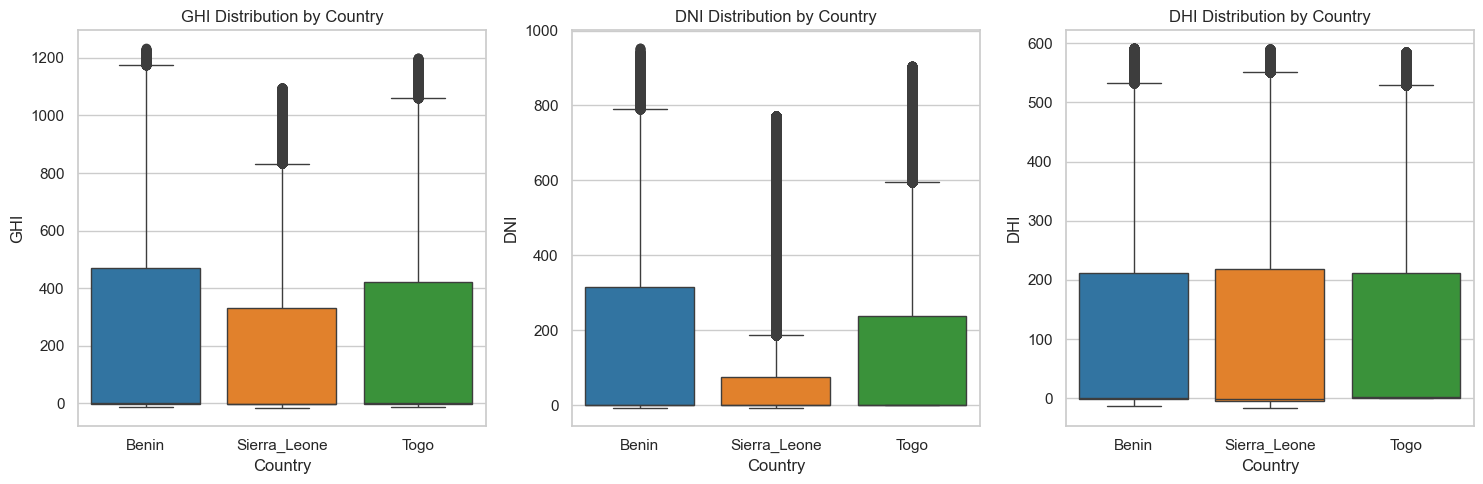

In [9]:
metrics = ["GHI", "DNI", "DHI"]
palette = {"Benin": "#1f77b4", "Sierra_Leone": "#ff7f0e", "Togo": "#2ca02c"}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, metric in zip(axes, metrics):
    sns.boxplot(
        x='Country', 
        y=metric, 
        hue='Country',   
        data=df_all, 
        palette=palette, 
        legend=False,    
        ax=ax
    )
    ax.set_title(f"{metric} Distribution by Country")
    ax.set_xlabel("Country")
    ax.set_ylabel(metric)

plt.tight_layout()
plt.show()

In [10]:
metrics = ["GHI", "DNI", "DHI"]
summary = summary_table(df_all, group_col="Country", metrics=metrics)
summary

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,236.234508,0.7,328.288787,166.896673,-0.1,262.081997,111.656477,0.5,153.099749
1,Sierra_Leone,185.000024,-0.4,279.019460,104.128943,-0.1,200.954182,108.104278,-0.6,153.691835
2,Togo,223.859675,0.5,317.306277,147.975931,0.0,247.683690,112.781249,1.5,151.571744


## 4. Statistical Testing (ANOVA / Kruskal–Wallis)
We perform a one-way ANOVA (or non-parametric Kruskal–Wallis test) on GHI values to determine if the differences between countries are statistically significant.


**Interpretation:**  
If p-value < 0.05 → Significant difference between at least one pair of countries.  
If p-value ≥ 0.05 → No statistically significant difference detected.


In [40]:
# ANOVA
anova_res = anova_test(df_all, group_col='country', value_col='GHI')
print("ANOVA result (GHI):", anova_res)
# Kruskal-Wallis
kruskal_res = kruskal_test(df_all, group_col='country', value_col='GHI')
print("Kruskal-Wallis result (GHI):", kruskal_res)

ANOVA result (GHI): {'F': 3833.1842028139463, 'p': 0.0}
Kruskal-Wallis result (GHI): {'H': 6548.5337890257515, 'p': 0.0}


## 5. Key Observations
- **Solar Resource Distribution by Country:** GHI differences are mainly driven by DNI disparities, while DHI remains fairly constant. Benin and Togo show the strongest overall and direct solar potential.  
- **Country Solar Statistics:** Benin has the highest average GHI and DNI. Sierra Leone has the lowest GHI and DNI with very low DNI variability, indicating consistently poor direct sunlight. All three countries have similar DHI averages.  
- **GHI Statistical Test Results:** Both ANOVA and Kruskal-Wallis tests confirm statistically significant differences in GHI distributions among Benin, Sierra Leone, and Togo.


## 6. Visual Summary
Bar chart ranking countries by **average GHI** to provide a quick comparative overview.



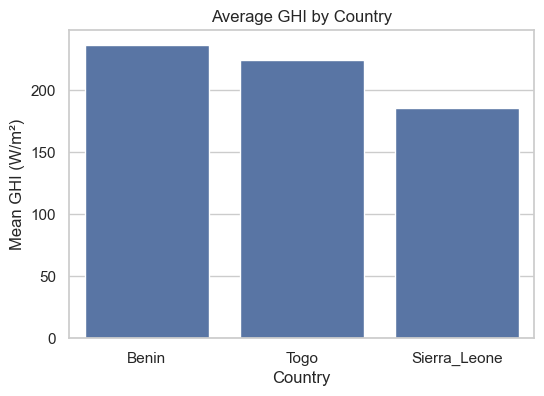

In [4]:
means = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=means.index, y=means.values)
plt.title("Average GHI by Country")
plt.ylabel("Mean GHI (W/m²)")
plt.xlabel("Country")
plt.show()
